In [25]:
from pathlib import Path
from pymatgen.io.ase import AseAtomsAdaptor
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
from collections import Counter
import sys
sys.path.append('..')
from ai4mat.data.data import StorageResolver, read_defects_descriptions

In [26]:
import pandas as pd

In [27]:
datasets = ("high_density_defects/BP_spin_500",
            "high_density_defects/GaSe_spin_500",
            "high_density_defects/hBN_spin_500",
            "high_density_defects/InSe_spin_500",
            "high_density_defects/MoS2_500",
            "high_density_defects/WSe2_500")
            #"low_density_defects/MoS2",
            #"low_density_defects/WSe2")

In [28]:
processed_path = StorageResolver()["processed"]

In [29]:
def format_defect(defect):
    if defect["type"] == "vacancy":
        return f"[Vac {defect['element']}]"
    else:
        return f"[{defect['from']} $\\rightarrow$ {defect['to']}]"

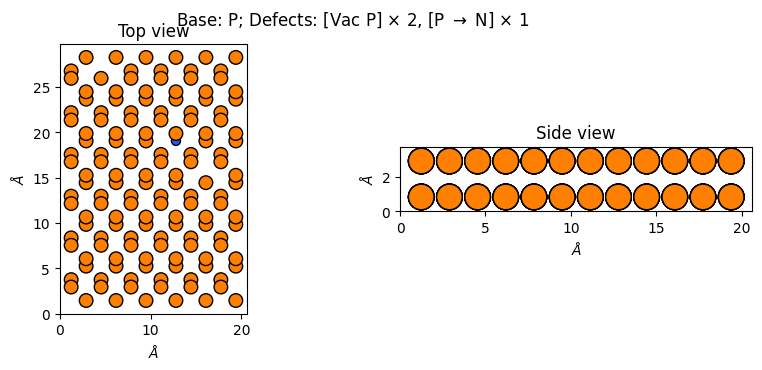

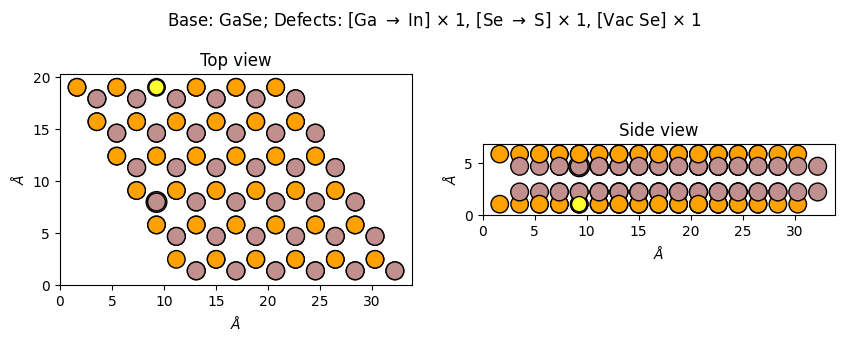

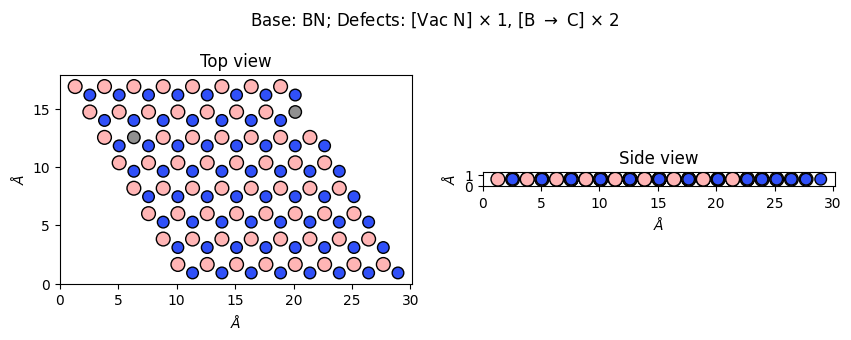

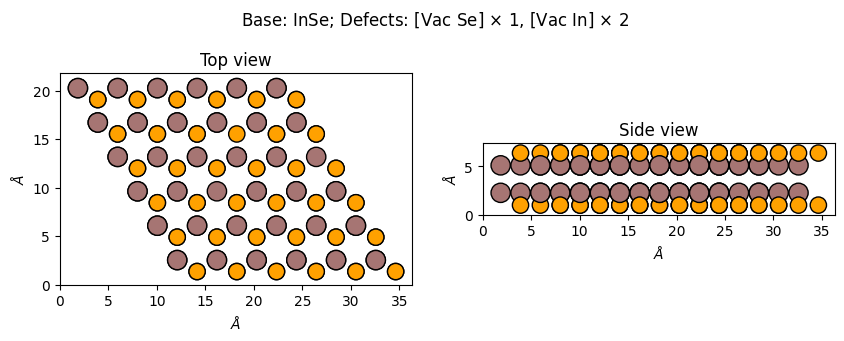

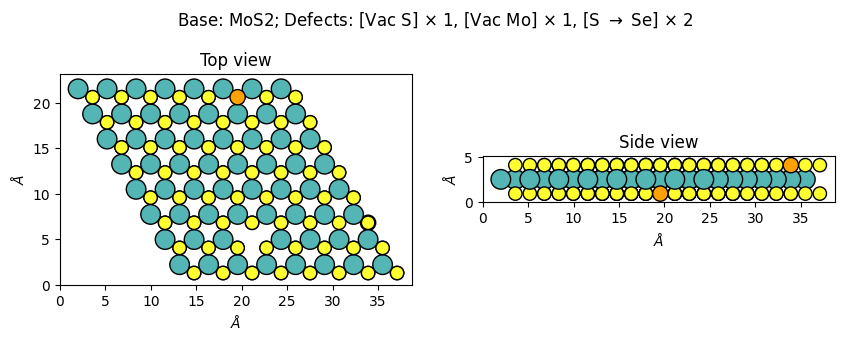

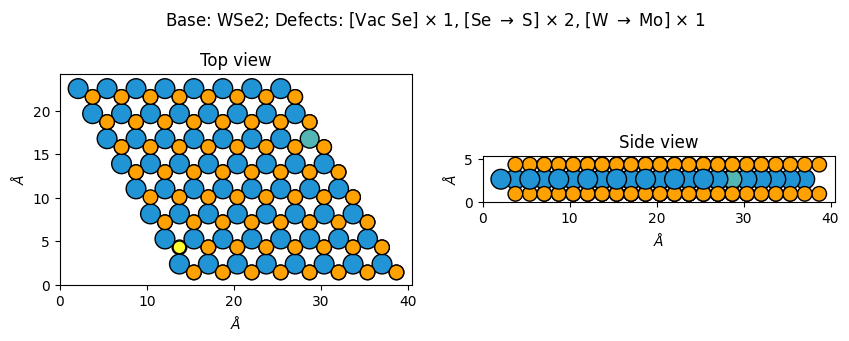

In [30]:
for dataset in datasets:
    structures = pd.read_pickle(StorageResolver()["processed"] / dataset / "data.pickle.gz")
    descriptors = read_defects_descriptions(StorageResolver()["csv_cif"] / dataset)
    save_path = Path("example_defect_plots") / Path(dataset).parent
    structure_to_plot = structures.iloc[0]
    defect = descriptors.loc[structure_to_plot.descriptor_id]
    ase_atoms = AseAtomsAdaptor.get_atoms(structure_to_plot.initial_structure)
    fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))
    plot_atoms(ase_atoms, ax=axes[0], radii=0.7, rotation=('0x, 0y, 0z'), show_unit_cell=False)
    plot_atoms(ase_atoms, ax=axes[1], radii=0.7, rotation=('90x, 0y, 0z'), show_unit_cell=False)
    for ax in axes:
        ax.set_xlabel('$\AA$')
        ax.set_ylabel('$\AA$')
    str_description = []
    for count, description in Counter(map(format_defect, defect.defects)).items():
        str_description.append(f"{count} $\\times$ {description}")
    axes[0].set_title("Top view")
    axes[1].set_title("Side view")
    title = f"Base: {defect.base}; Defects: " + ", ".join(str_description)
    fig.suptitle(title)
    save_path.mkdir(parents=True, exist_ok=True)
    fig.savefig(save_path / f"{Path(dataset).name}.pdf", bbox_inches='tight')

In [31]:
#from pymatgen.vis.structure_vtk import StructureVis
#vis = StructureVis()
#vis.set_structure(structures.iloc[0])
#vis.show()